In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv('iris.data')
df.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [3]:
df.columns = ['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
df.head()

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [6]:
X = df.ix[:,0:4].values
y = df.ix[:,4].values
# y

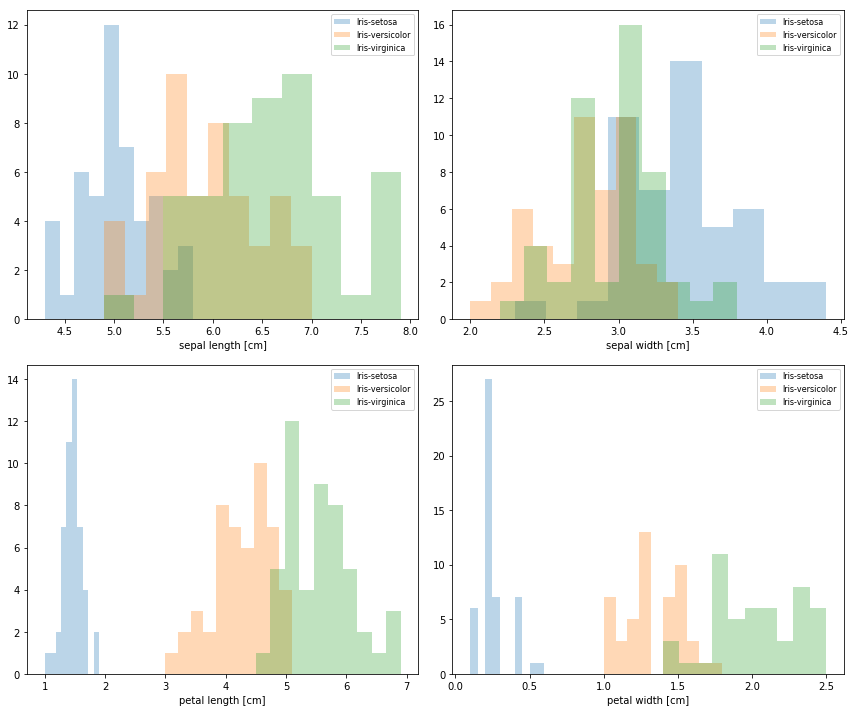

In [10]:
import matplotlib.pyplot as plt
import math
label_dict = {
    1: 'Iris-Setosa',
    2: 'Iris-Versicolor',
    3: 'Iris-Virgnica'
}
feature_dict = {
    0: 'sepal length [cm]',
    1: 'sepal width [cm]',
    2: 'petal length [cm]',
    3: 'petal width [cm]'   
}
#画布
plt.figure(figsize = (12,10))

for cnt in range(4):
    #子图序号
    plt.subplot(2,2,cnt+1)
    #标签
    for lab in ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'):
        plt.hist(X[y==lab,cnt],
                label = lab,
                 bins = 10,
                 alpha = 0.3,)
        plt.xlabel(feature_dict[cnt])
        plt.legend(loc='upper right', fancybox=True, fontsize=8)
plt.tight_layout()
plt.show()

In [11]:
#标准化 【-1，1】区间
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
print (X_std)

[[-1.1483555  -0.11805969 -1.35396443 -1.32506301]
 [-1.3905423   0.34485856 -1.41098555 -1.32506301]
 [-1.51163569  0.11339944 -1.29694332 -1.32506301]
 [-1.02726211  1.27069504 -1.35396443 -1.32506301]
 [-0.54288852  1.9650724  -1.18290109 -1.0614657 ]
 [-1.51163569  0.8077768  -1.35396443 -1.19326436]
 [-1.02726211  0.8077768  -1.29694332 -1.32506301]
 [-1.75382249 -0.34951881 -1.35396443 -1.32506301]
 [-1.1483555   0.11339944 -1.29694332 -1.45686167]
 [-0.54288852  1.50215416 -1.29694332 -1.32506301]
 [-1.2694489   0.8077768  -1.23992221 -1.32506301]
 [-1.2694489  -0.11805969 -1.35396443 -1.45686167]
 [-1.87491588 -0.11805969 -1.52502777 -1.45686167]
 [-0.05851493  2.19653152 -1.46800666 -1.32506301]
 [-0.17960833  3.122368   -1.29694332 -1.0614657 ]
 [-0.54288852  1.9650724  -1.41098555 -1.0614657 ]
 [-0.90616871  1.03923592 -1.35396443 -1.19326436]
 [-0.17960833  1.73361328 -1.18290109 -1.19326436]
 [-0.90616871  1.73361328 -1.29694332 -1.19326436]
 [-0.54288852  0.8077768  -1.18

In [12]:
#协方差矩阵
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00675676 -0.10448539  0.87716999  0.82249094]
 [-0.10448539  1.00675676 -0.41802325 -0.35310295]
 [ 0.87716999 -0.41802325  1.00675676  0.96881642]
 [ 0.82249094 -0.35310295  0.96881642  1.00675676]]


In [13]:
# np 函数实现方式
print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

NumPy covariance matrix: 
[[ 1.00675676 -0.10448539  0.87716999  0.82249094]
 [-0.10448539  1.00675676 -0.41802325 -0.35310295]
 [ 0.87716999 -0.41802325  1.00675676  0.96881642]
 [ 0.82249094 -0.35310295  0.96881642  1.00675676]]


In [16]:
cov_mat = np.cov(X_std.T)

#计算矩阵特征向量
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('特征向量Eigenvectors\n%s' %eig_vecs)
print('特征值Eigenvalues \n%s' %eig_vals)

特征向量Eigenvectors
[[ 0.52308496 -0.36956962 -0.72154279  0.26301409]
 [-0.25956935 -0.92681168  0.2411952  -0.12437342]
 [ 0.58184289 -0.01912775  0.13962963 -0.80099722]
 [ 0.56609604 -0.06381646  0.63380158  0.52321917]]
特征值Eigenvalues 
[ 2.92442837  0.93215233  0.14946373  0.02098259]


In [17]:
# Make a list of (特征值, 特征向量) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
print (eig_pairs)
print ('----------')
# Sort the (特征值, 特征向量) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# 特征值排序
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

[(2.9244283691111144, array([ 0.52308496, -0.25956935,  0.58184289,  0.56609604])), (0.93215233025350641, array([-0.36956962, -0.92681168, -0.01912775, -0.06381646])), (0.14946373489813314, array([-0.72154279,  0.2411952 ,  0.13962963,  0.63380158])), (0.020982592764270606, array([ 0.26301409, -0.12437342, -0.80099722,  0.52321917]))]
----------
Eigenvalues in descending order:
2.92442836911
0.932152330254
0.149463734898
0.0209825927643


In [27]:
#特征值归一化，然后计算100%占比
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
print (var_exp)
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

[72.620033326920336, 23.147406858644135, 3.7115155645845164, 0.52104424985101538]


array([  72.62003333,   95.76744019,   99.47895575,  100.        ])

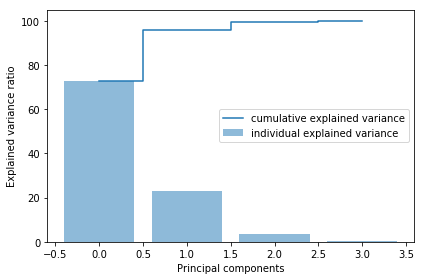

In [28]:
plt.figure(figsize=(6, 4))
#d独立方差
plt.bar(range(4), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
#累计方差
plt.step(range(4), cum_var_exp, where='mid',
             label='cumulative explained variance')

plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [29]:
#选出其中2个特征值  最大的  特征向量
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1)))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.52308496 -0.36956962]
 [-0.25956935 -0.92681168]
 [ 0.58184289 -0.01912775]
 [ 0.56609604 -0.06381646]]


In [30]:
#原始矩阵 与 求得变换矩阵空间  相乘
Y = X_std.dot(matrix_w)

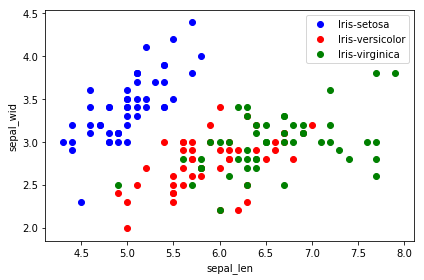

In [31]:
plt.figure(figsize=(6, 4))
for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('blue', 'red', 'green')):
     plt.scatter(X[y==lab, 0],
                X[y==lab, 1],
                label=lab,
                c=col)
plt.xlabel('sepal_len')
plt.ylabel('sepal_wid')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

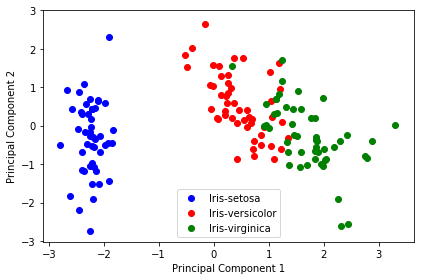

In [32]:
plt.figure(figsize=(6, 4))
for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('blue', 'red', 'green')):
     plt.scatter(Y[y==lab, 0],
                Y[y==lab, 1],
                label=lab,
                c=col)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='lower center')
plt.tight_layout()
plt.show()